# bank marketing - 포르투갈의 은행에서 고객에게 예금 상품을 진행 홍보, 결과를 예측
- 3가지 클러스터링 방식으로 고객들을 클러스터링하세요.
  1. 문자를 숫자로 원핫 인코딩
  1. 2차원으로 축소 PCA
  1. K-Means(k선택), 병합군집(k선택), DBSCAN(eps 거리 조절)
- 상품에 가입한 사람과 가입하지 않은 사람들을 미리 예측하세요.
  1. 원핫 인코딩
  1. X, Y 분리
  1. 결정트리 학습
  1. 트리 그래프로 시각화
     - 고객에게 전화를 걸어 신상품을 파는 임무를 바았습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 상품에 가입해 줄 착한 고객을 어떻게 찾으면 좋을까요?

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
banks = pd.read_csv('bank/bank.csv', sep=';')
banks.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [55]:
banks.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [56]:
(banks['y']=='yes').mean()

0.11523999115239991

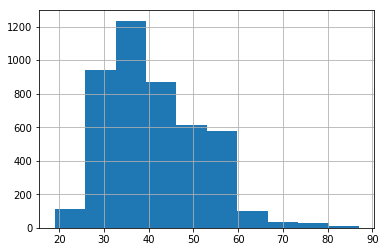

In [57]:
banks['age'].hist()

In [58]:
banks.isna().sum().sum()  # 누락된 값은 없다.

0

In [59]:
job = banks['job']

# EAD
- 탐색적 데이터 분석

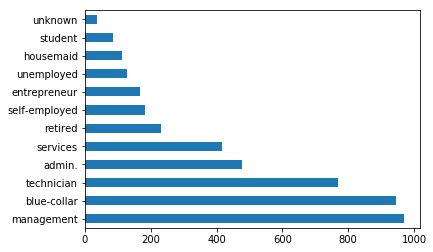

In [60]:
job.value_counts().plot.barh()

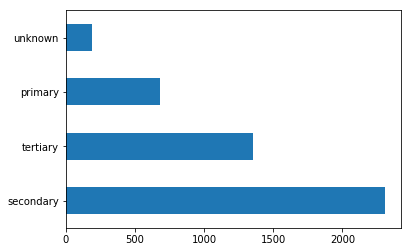

In [61]:
banks.education.value_counts().plot.barh()

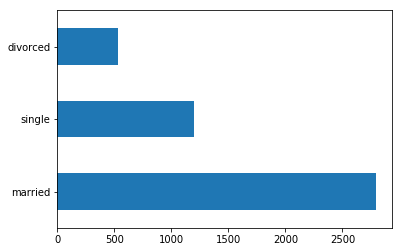

In [62]:
banks.marital.value_counts().plot.barh()

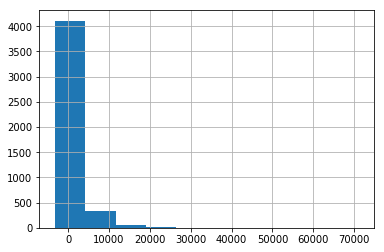

In [63]:
banks.balance.hist()

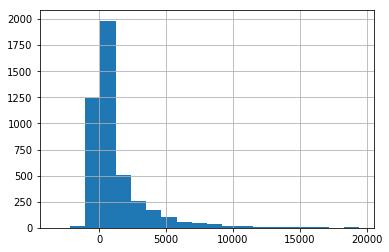

In [64]:
banks[banks.balance < 20000].balance.hist(bins=20) # 데이터 [조건]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A32B741080>,
      dtype=object)

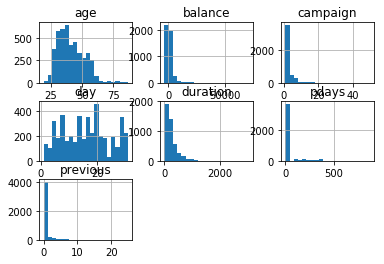

In [65]:
banks.hist(bins=20)

- 3가지 클러스터링(비교사학습)을 하세요
- 결정트리(교사학습)
  - 고객에게 전화를 걸어 상품을 홍보하라는 임무를 받았습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다.
  - 상품에 가입해줄 착한 고객을 어떻게 찾으면 좋을까요?

In [66]:
bank_hot = pd.get_dummies(banks)

In [67]:
bank_hot.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [69]:
bank_hot.shape, banks.shape

((4521, 53), (4521, 17))

In [108]:
x = bank_hot.iloc[:,:-2]
y = bank_hot.iloc[:,-1]
x.shape, y.shape

((4521, 51), (4521,))

In [73]:
# 2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)

In [74]:
bank_pca = pca.transform(x)
bank_pca.shape

(4521, 2)

In [75]:
from sklearn.cluster import KMeans
import mglearn

In [76]:
# k-means로 클러스터링
km = KMeans(n_clusters=2).fit(bank_pca)
group = km.predict(bank_pca)

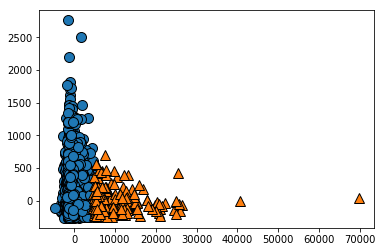

In [77]:
l = mglearn.discrete_scatter(bank_pca[:,0], bank_pca[:,1], group)

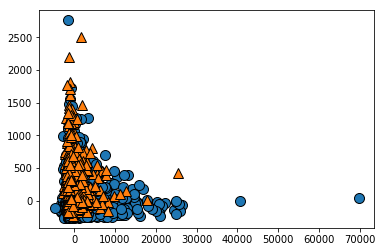

In [78]:
l = mglearn.discrete_scatter(bank_pca[:,0], bank_pca[:,1], bank_hot['y_yes'])

In [84]:
from sklearn.cluster import AgglomerativeClustering

In [85]:
model = AgglomerativeClustering(n_clusters=2)

In [86]:
p = model.fit_predict(x)

In [87]:
import mglearn

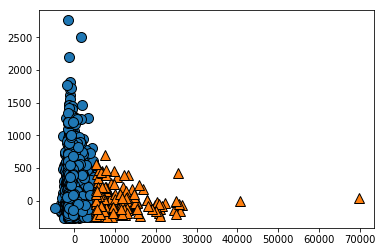

In [89]:
mglearn.discrete_scatter(bank_pca[:,0], bank_pca[:,1],p)

In [90]:
from sklearn.cluster import DBSCAN

In [103]:
p = DBSCAN(eps=2).fit_predict(x)   # k 개를 정해주지 않음.

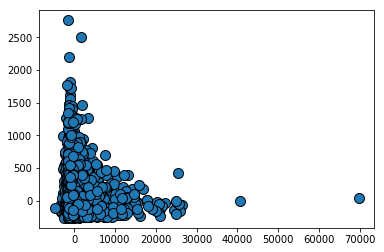

In [105]:
mglearn.discrete_scatter(bank_pca[:,0], bank_pca[:,1],p)

- 상품에 가입한 사람과 가입하지 않은 사람들을 미리 예측하세요.
  1. 원핫 인코딩
  1. X, Y 분리
  1. 결정트리 학습
  1. 트리 그래프로 시각화
     - 고객에게 전화를 걸어 신상품을 파는 임무를 바았습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 상품에 가입해 줄 착한 고객을 어떻게 찾으면 좋을까요?

In [129]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 분류용/예측용

In [130]:
tree = DecisionTreeClassifier().fit(x,y)

In [131]:
tree.score(x,y)

1.0

In [135]:
# p108 트리 그림 그리기(파일로 트리 지장)
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['NO', 'OK'], feature_names=x.columns,
                impurity=False, filled=True)  # class_names=['NO', 'OK']은 Y(y_yes)의 값 0,1을 나타냄

In [136]:
# graphviz=2.38.msi 설치  : https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
import os
os.environ["PATH"] += os.pathsep + 'C:/program Files (x86)/Graphviz2.38/bin/'

In [143]:
import graphviz # anaconda prompt /pip install graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)    
#display(g)
g.render(filename='tree', format='png', view=True)

'tree.png'

In [127]:
tree2 = DecisionTreeClassifier().fit(x,y)
importance = pd.DataFrame(tree2.feature_importances_, x.columns)  # feature_importances_ => 트리에서 중요하다고 생각하는 것

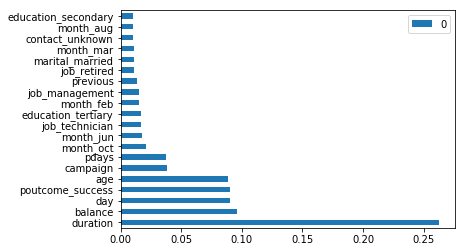

In [141]:
p = importance.sort_values(by=0, ascending=False).head(20).plot.barh()

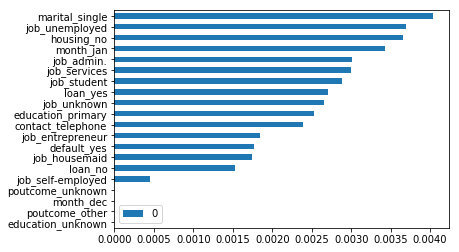

In [142]:
p = importance.sort_values(by=0).head(20).plot.barh()